# Capital Market- Trends in Stocks

### Installing Dependencies

In [1]:
import subprocess

subprocess.run(["pip", "install", "-r", "/content/requirements.txt"])

CompletedProcess(args=['pip', 'install', '-r', '/content/requirements.txt'], returncode=1)

# Importing Necessary Libraries

In [2]:
import yfinance as yf  
from sklearn.cluster import KMeans 
from sklearn.manifold import TSNE  
import pandas as pd 
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.metrics import adjusted_rand_score  
from sklearn.preprocessing import StandardScaler  
import seaborn as sns  
from sklearn.decomposition import PCA  
from sklearn.cluster import AgglomerativeClustering  
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import DBSCAN
from pytz import utc
from sklearn.metrics import silhouette_score

#### stock price and Industery base clustering of 500 companies S&P500

#### Setting companies stock symbols to tickers of 500 Companies

In [3]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE',
           'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN',
           'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY',
           'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX',
           'BMY', 'AVGO', 'BR', 'BRO', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE',
           'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX',
           'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX',
           'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DHI', 'DTE',
           'DUK', 'DD', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL',
           'ETSY', 'EG', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FI', 'FLT',
           'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS',
           'HAL', 'HIG', 'HAS', 'HCA', 'DOC', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB', 'HUM', 'HBAN', 'HII', 'IBM',
           'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JBL', 'JKHY',
           'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS',
           'LEN', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK',
           'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI',
           'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI',
           'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM',
           'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF',
           'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SRE', 'NOW', 'SHW',
           'SPG', 'SWKS', 'SJM', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL',
           'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UBER', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS',
           'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC', 'WRB', 'WAB', 'WBA', 'WMT', 'DIS', 'WBD', 'WM', 'WAT', 'WEC',
           'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION']

##### Gathering stock data via Yfinance from data **1990 to 2018** and Storing them into two CSV files


*   One holds the stock price data
*   One holds the companies inducstry and other info



Gathering stock price data

In [4]:
all_data_stock = pd.DataFrame()

for y in tickers:
  ticker_symbol = y
  start_date = '1990-05-08'
  end_date = '2018-05-08'
  ticker = yf.Ticker(ticker_symbol)
  historical_data = ticker.history(start=start_date, end=end_date)
  historical_data.reset_index(inplace=True)
  historical_data.rename(columns={'Date': 'date'}, inplace=True)
  historical_data['ticker'] = ticker_symbol
  extracted_data = historical_data[['ticker', 'Open', 'Close', 'Low', 'High', 'Volume', 'date']]
  all_data_stock = pd.concat([all_data_stock, extracted_data], ignore_index=True)


ABNB: Data doesn't exist for startDate = 642139200, endDate = 1525752000
CARR: Data doesn't exist for startDate = 642139200, endDate = 1525752000
CEG: Data doesn't exist for startDate = 642139200, endDate = 1525752000
CTVA: Data doesn't exist for startDate = 642139200, endDate = 1525752000
DOW: Data doesn't exist for startDate = 642139200, endDate = 1525752000
FOXA: Data doesn't exist for startDate = 642139200, endDate = 1525752000
FOX: Data doesn't exist for startDate = 642139200, endDate = 1525752000
GEHC: Data doesn't exist for startDate = 642139200, endDate = 1525752000
KVUE: Data doesn't exist for startDate = 642139200, endDate = 1525752000
MRNA: Data doesn't exist for startDate = 642139200, endDate = 1525752000
OTIS: Data doesn't exist for startDate = 642139200, endDate = 1525752000
UBER: Data doesn't exist for startDate = 642139200, endDate = 1525752000
VLTO: Data doesn't exist for startDate = 642139200, endDate = 1525752000


Gathering Companies Info

In [5]:
all_data = pd.DataFrame()

for x in tickers:
    #print(x)
    ticker = yf.Ticker(x)
    info = ticker.info
    info_df = pd.DataFrame({
        'ticker': [info['symbol']],
        'exchange': [info['exchange']],
        'name': [info['longName']],
        'sector': [info['sector']],
        'industry': [info['industry']]
    })
    merged_data = pd.merge(all_data_stock, info_df, on='ticker')
    all_data = pd.concat([all_data, merged_data], ignore_index=True)
all_data.to_csv('merged_stock_data.csv', index=False)


In [6]:
stock_Data_whole = pd.read_csv('merged_stock_data.csv')
stock_Data_whole.head()

,ticker,Open,Close,Low,High,Volume,date,exchange,name,sector,industry
0,MMM,7.298563,7.389795,7.275755,7.389795,1436400.0,1990-05-08 00:00:00-04:00,NYQ,3M Company,Industrials,Conglomerates
1,MMM,7.389793,7.469621,7.378389,7.503833,1736400.0,1990-05-09 00:00:00-04:00,NYQ,3M Company,Industrials,Conglomerates
2,MMM,7.469620,7.412600,7.378388,7.469620,2230000.0,1990-05-10 00:00:00-04:00,NYQ,3M Company,Industrials,Conglomerates
3,MMM,7.458218,7.572258,7.435410,7.606470,3272400.0,1990-05-11 00:00:00-04:00,NYQ,3M Company,Industrials,Conglomerates
4,MMM,7.595067,7.640683,7.583663,7.697703,2184000.0,1990-05-14 00:00:00-04:00,NYQ,3M Company,Industrials,Conglomerates


### Clean & Process the data

In [7]:
stock_Data_whole.shape

(2726304, 11)

In [8]:
stock_Data_whole.dtypes

ticker       object
Open        float64
Close       float64
Low         float64
High        float64
Volume      float64
date         object
exchange     object
name         object
sector       object
industry     object
dtype: object

In [9]:
stock_Data_whole.isnull().sum().sort_values()

ticker      0
Open        0
Close       0
Low         0
High        0
Volume      0
date        0
exchange    0
name        0
sector      0
industry    0
dtype: int64

reading and storing data to variable


*   Merge the data on the base of ticker of each company


In [10]:
stocks = stock_Data_whole[['Open', 'date', 'ticker', 'sector']]
stocks.head()


,Open,date,ticker,sector
0,7.298563,1990-05-08 00:00:00-04:00,MMM,Industrials
1,7.389793,1990-05-09 00:00:00-04:00,MMM,Industrials
2,7.469620,1990-05-10 00:00:00-04:00,MMM,Industrials
3,7.458218,1990-05-11 00:00:00-04:00,MMM,Industrials
4,7.595067,1990-05-14 00:00:00-04:00,MMM,Industrials


Filtering the data on the base of year to perform analysis on data subset
* Filtered data form 1995 to 2014

In [11]:
stocks_year = stocks[(stocks['date'] >= '1995-05-08') & (stocks['date'] <= '2014-01-24')]
#stocks_year = stocks_year.reset_index()
stocks_year.head()

,Open,date,ticker,sector
1264,13.011500,1995-05-08 00:00:00-04:00,MMM,Industrials
1265,12.957510,1995-05-09 00:00:00-04:00,MMM,Industrials
1266,12.957513,1995-05-10 00:00:00-04:00,MMM,Industrials
1267,13.254454,1995-05-11 00:00:00-04:00,MMM,Industrials
1268,13.308446,1995-05-12 00:00:00-04:00,MMM,Industrials


In [12]:
#stocks_year.shape

Droping Duplicates by consideing ticker and sector
* Do this as we perofrm analysis on the bases of sector and stock price

In [13]:
df = stocks_year[['ticker', 'sector']].drop_duplicates()
#print(df.head())
df.head()

,ticker,sector
1264,MMM,Industrials
8319,AOS,Industrials
15374,ABT,Healthcare
21165,ABBV,Healthcare
22511,ACN,Technology


Calculating companies in each Industry sector category

In [14]:
df2 = df.groupby('sector')['ticker'].count().sort_values(ascending=False).head(12)
df2 = df2.reset_index()
df2.columns = ['sector', 'count']
df2

,sector,count
0,Industrials,68
1,Technology,67
2,Financial Services,63
3,Healthcare,61
4,Consumer Cyclical,54
5,Consumer Defensive,33
6,Real Estate,29
7,Utilities,29
8,Energy,23
9,Basic Materials,20


Merge the stock data and company detail data on the base of sector and Open **(price at which the financial security opens in the market when trading begins)**

In [15]:
stocks_11sectors = pd.merge(stocks_year, df2, on='sector', how='inner')[['Open', 'date', 'ticker', 'sector']]
stocks_11sectors.head()

,Open,date,ticker,sector
0,13.011500,1995-05-08 00:00:00-04:00,MMM,Industrials
1,12.957510,1995-05-09 00:00:00-04:00,MMM,Industrials
2,12.957513,1995-05-10 00:00:00-04:00,MMM,Industrials
3,13.254454,1995-05-11 00:00:00-04:00,MMM,Industrials
4,13.308446,1995-05-12 00:00:00-04:00,MMM,Industrials


Sorting the data on the bases of data and tickers
* chaging date time pattern
* adding **num** column in dataframe which hold each ticker count in it

In [16]:
stocks_11sectors['date'] = pd.to_datetime(stocks_11sectors['date'])
stocks_11sectors = stocks_11sectors.sort_values(['ticker', 'date'])
stocks_11sectors['num'] = stocks_11sectors.groupby('ticker').cumcount() + 1
stocks_11sectors.head()


,Open,date,ticker,sector,num
284575,27.605775,1999-11-18 00:00:00-05:00,A,Healthcare,1
284576,26.051053,1999-11-19 00:00:00-05:00,A,Healthcare,2
284577,25.065134,1999-11-22 00:00:00-05:00,A,Healthcare,3
284578,25.785615,1999-11-23 00:00:00-05:00,A,Healthcare,4
284579,24.344656,1999-11-24 00:00:00-05:00,A,Healthcare,5


Creating new dataframe
sorting data on the base of tickers and no then adding two column open1 having actual opening value and open2 having shifted value by 1


*   open2 is basically the next day opening price


In [17]:
added_open2 = stocks_11sectors.sort_values(['ticker', 'num'])
added_open2['open1'] = added_open2['Open']
added_open2['open2'] = added_open2.groupby('ticker')['Open'].shift(-1)
added_open2 = added_open2[['open1', 'date', 'ticker', 'sector', 'open2']].dropna()
added_open2.head()

,open1,date,ticker,sector,open2
284575,27.605775,1999-11-18 00:00:00-05:00,A,Healthcare,26.051053
284576,26.051053,1999-11-19 00:00:00-05:00,A,Healthcare,25.065134
284577,25.065134,1999-11-22 00:00:00-05:00,A,Healthcare,25.785615
284578,25.785615,1999-11-23 00:00:00-05:00,A,Healthcare,24.344656
284579,24.344656,1999-11-24 00:00:00-05:00,A,Healthcare,24.799688


Calculating daily return **amount made or lost on that stock from one day to the next** with formula and sotring into new column of Dataframe

In [18]:
added_open2['daily_return'] = (added_open2['open2'] / added_open2['open1']) * 100 - 100
data_daily_return = added_open2
data_daily_return = data_daily_return[['ticker','date', 'sector', 'open1', 'open2', 'daily_return']]
data_daily_return.head()

,ticker,date,sector,open1,open2,daily_return
284575,A,1999-11-18 00:00:00-05:00,Healthcare,27.605775,26.051053,-5.631873
284576,A,1999-11-19 00:00:00-05:00,Healthcare,26.051053,25.065134,-3.784564
284577,A,1999-11-22 00:00:00-05:00,Healthcare,25.065134,25.785615,2.874435
284578,A,1999-11-23 00:00:00-05:00,Healthcare,25.785615,24.344656,-5.588230
284579,A,1999-11-24 00:00:00-05:00,Healthcare,24.344656,24.799688,1.869128


view summary of daily return column via describe function(quick overview of data)

In [19]:
summary = data_daily_return['daily_return'].describe()
print(summary)

count    1.861757e+06
mean     8.265849e-02
std      2.607715e+00
min     -7.401686e+01
25%     -1.020766e+00
50%      4.401198e-05
75%      1.126776e+00
max      1.059160e+02
Name: daily_return, dtype: float64


### Find anomaly

Visulizing the daily return column via box plot graph usign sns library

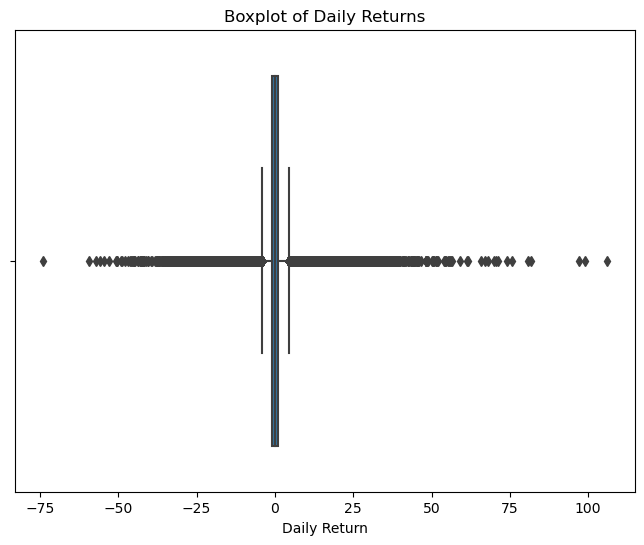

In [20]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_daily_return['daily_return'])
plt.title('Boxplot of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

##### Dealing with outlier

removing outlier by considering the daily_return column

In [21]:
Q1 = data_daily_return['daily_return'].quantile(0.25)
Q3 = data_daily_return['daily_return'].quantile(0.75)
IQR = Q3 - Q1
max_val = Q3 + 1.5 * IQR
min_val = Q1 - 1.5 * IQR
outliers = data_daily_return[(data_daily_return['daily_return'] < min_val) | (data_daily_return['daily_return'] > max_val)]
outliers = outliers.index

applying a function DataFrame for the rows specified by outliers function checks each value (x) in the ‘daily_return’ column:

* If x is greater than max_val, it replaces x with max_val.
* If x is less than min_val, it replaces x with min_val.
* If x is between min_val and max_val, it leaves x unchanged.


In [22]:
data_daily_return.loc[outliers, 'daily_return'] = data_daily_return.loc[outliers, 'daily_return'].apply(lambda x: max_val if x > max_val else (min_val if x < min_val else x))
data_daily_return.head()


,ticker,date,sector,open1,open2,daily_return
284575,A,1999-11-18 00:00:00-05:00,Healthcare,27.605775,26.051053,-4.242080
284576,A,1999-11-19 00:00:00-05:00,Healthcare,26.051053,25.065134,-3.784564
284577,A,1999-11-22 00:00:00-05:00,Healthcare,25.065134,25.785615,2.874435
284578,A,1999-11-23 00:00:00-05:00,Healthcare,25.785615,24.344656,-4.242080
284579,A,1999-11-24 00:00:00-05:00,Healthcare,24.344656,24.799688,1.869128


showing summary of daily return without outliers

In [23]:
summary = data_daily_return['daily_return'].describe()
print(summary)
data_daily_return.head()

count    1.861757e+06
mean     6.014883e-02
std      1.922476e+00
min     -4.242080e+00
25%     -1.020766e+00
50%      4.401198e-05
75%      1.126776e+00
max      4.348090e+00
Name: daily_return, dtype: float64


,ticker,date,sector,open1,open2,daily_return
284575,A,1999-11-18 00:00:00-05:00,Healthcare,27.605775,26.051053,-4.242080
284576,A,1999-11-19 00:00:00-05:00,Healthcare,26.051053,25.065134,-3.784564
284577,A,1999-11-22 00:00:00-05:00,Healthcare,25.065134,25.785615,2.874435
284578,A,1999-11-23 00:00:00-05:00,Healthcare,25.785615,24.344656,-4.242080
284579,A,1999-11-24 00:00:00-05:00,Healthcare,24.344656,24.799688,1.869128


Showing cleared daily return plot

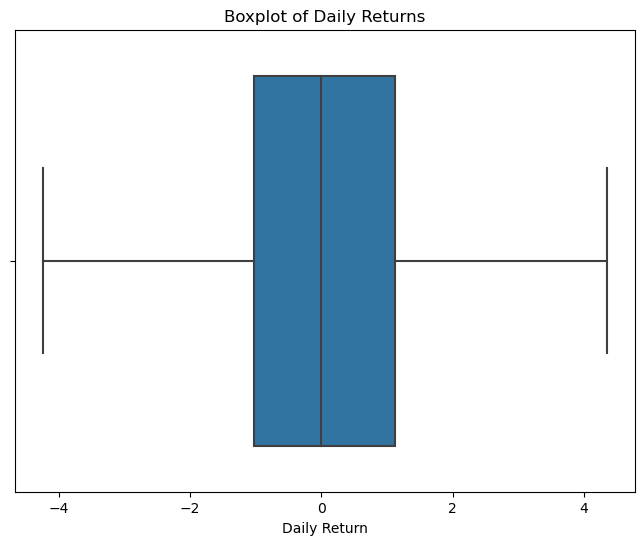

In [24]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_daily_return['daily_return'])
plt.title('Boxplot of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

#Filling null value with 0 by considering both column date and daily_returns

## Reducing dimensions

#### PCA

In [25]:
data_daily_return.set_index(['ticker','sector'], inplace=True)
stocks_daily_return = data_daily_return.pivot(columns='date', values='daily_return').fillna(0)
#print(stocks_daily_return.columns)
stocks_daily_return.reset_index(inplace=True)
#print(stocks_daily_return.columns)
stocks_daily_return.head()

date,ticker,sector,1995-05-08 00:00:00-04:00,1995-05-09 00:00:00-04:00,1995-05-10 00:00:00-04:00,1995-05-11 00:00:00-04:00,1995-05-12 00:00:00-04:00,1995-05-15 00:00:00-04:00,1995-05-16 00:00:00-04:00,1995-05-17 00:00:00-04:00,...,2014-01-08 00:00:00-05:00,2014-01-09 00:00:00-05:00,2014-01-10 00:00:00-05:00,2014-01-13 00:00:00-05:00,2014-01-14 00:00:00-05:00,2014-01-15 00:00:00-05:00,2014-01-16 00:00:00-05:00,2014-01-17 00:00:00-05:00,2014-01-21 00:00:00-05:00,2014-01-22 00:00:00-05:00
0,A,Healthcare,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.866375,0.188372,0.444373,0.663601,1.115599,0.702097,0.979436,-0.230137,0.214180,-0.559014
1,AAL,Industrials,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,4.348090,2.868289,0.447508,-1.473603,0.521719,0.138418,1.243939,4.348090,0.163075,-0.195368
2,AAPL,Technology,1.880708,2.154036,0.301231,-1.802012,4.34809,-0.000027,1.449229,0.857106,...,1.482906,-1.274695,-1.837650,1.568210,2.842671,0.249362,-0.616337,-1.902140,1.833630,-0.176072
3,ABBV,Healthcare,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,-0.079023,1.344115,-0.407101,-1.421215,1.421699,-1.085881,1.077806,-0.750372,-0.557121,-2.480966
4,ABT,Healthcare,1.246139,-1.846170,0.313466,-0.000016,-4.24208,0.993378,2.295080,-0.961511,...,1.081051,0.000060,0.149378,0.485757,0.763372,-0.176773,0.834840,-0.853005,-3.795554,-0.315600


#Data frame with only numerical features

In [26]:
rem_cat = stocks_daily_return.iloc[:, 2:]
rem_cat.head()
#print(rem_cat.columns)

date,1995-05-08 00:00:00-04:00,1995-05-09 00:00:00-04:00,1995-05-10 00:00:00-04:00,1995-05-11 00:00:00-04:00,1995-05-12 00:00:00-04:00,1995-05-15 00:00:00-04:00,1995-05-16 00:00:00-04:00,1995-05-17 00:00:00-04:00,1995-05-18 00:00:00-04:00,1995-05-19 00:00:00-04:00,...,2014-01-08 00:00:00-05:00,2014-01-09 00:00:00-05:00,2014-01-10 00:00:00-05:00,2014-01-13 00:00:00-05:00,2014-01-14 00:00:00-05:00,2014-01-15 00:00:00-05:00,2014-01-16 00:00:00-05:00,2014-01-17 00:00:00-05:00,2014-01-21 00:00:00-05:00,2014-01-22 00:00:00-05:00
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.866375,0.188372,0.444373,0.663601,1.115599,0.702097,0.979436,-0.230137,0.214180,-0.559014
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.348090,2.868289,0.447508,-1.473603,0.521719,0.138418,1.243939,4.348090,0.163075,-0.195368
2,1.880708,2.154036,0.301231,-1.802012,4.34809,-0.000027,1.449229,0.857106,-2.832700,-0.874838,...,1.482906,-1.274695,-1.837650,1.568210,2.842671,0.249362,-0.616337,-1.902140,1.833630,-0.176072
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.079023,1.344115,-0.407101,-1.421215,1.421699,-1.085881,1.077806,-0.750372,-0.557121,-2.480966
4,1.246139,-1.846170,0.313466,-0.000016,-4.24208,0.993378,2.295080,-0.961511,-2.588993,0.996585,...,1.081051,0.000060,0.149378,0.485757,0.763372,-0.176773,0.834840,-0.853005,-3.795554,-0.315600


Applying PCA on all columns of the new data frame (rem_cat) to see PCA values for each of them

In [27]:
pca = PCA()
pca_out = pca.fit_transform(rem_cat)
df_out = pd.DataFrame(pca_out, columns=[f'PC{i}' for i in range(1, len(pca_out[0])+1)])
df_out.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC458,PC459,PC460,PC461,PC462,PC463,PC464,PC465,PC466,PC467
0,29.149639,16.041242,17.398436,-5.598639,-4.347801,2.859906,2.364513,21.791470,-3.079752,0.546831,...,-0.035786,0.028931,-0.113740,0.046262,-0.051440,-0.025702,0.000349,-0.004505,-2.583374e-12,5.553695e-14
1,-16.105183,-5.102858,10.992325,-39.035313,5.014759,-7.502948,1.345299,3.070806,0.376663,14.840594,...,-0.134994,0.055231,-0.007198,0.164627,-0.176827,-0.051479,-0.034914,0.005506,2.160437e-11,5.553695e-14
2,47.220237,30.509510,7.602140,8.545364,13.907754,-4.203845,-0.932959,-7.873303,13.785418,-12.762737,...,-0.019076,-0.017042,0.043138,-0.148309,-0.007934,0.003702,-0.002959,0.000618,-1.232899e-11,5.553695e-14
3,-43.199649,27.440706,-0.099234,-4.800114,2.682925,-7.930799,-9.144330,-1.347920,4.653646,1.550117,...,0.690623,10.350492,11.155481,-10.959986,-7.783457,0.129047,-0.327217,0.432279,3.816711e-11,5.553695e-14
4,-18.719542,9.406095,-35.090943,13.135687,-2.216789,4.142696,-7.689478,-9.233705,-4.362987,-1.440375,...,-0.021306,0.042953,0.065291,0.148793,0.017344,-0.036732,0.003624,-0.002420,2.238508e-11,5.553695e-14


showing two PCA components by using scatter plot to create custom bi plot to check how much points are overlapping in data points

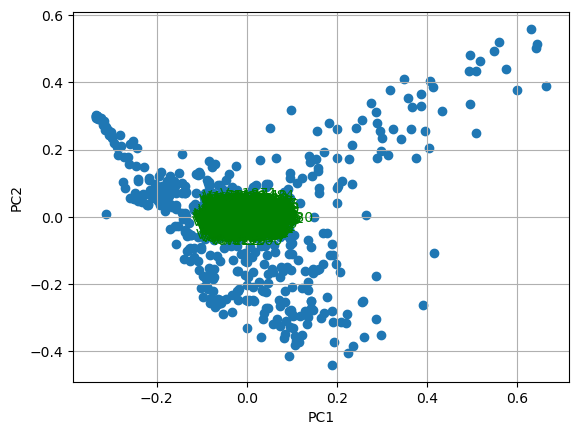

In [28]:
pca = PCA()
x_new = pca.fit_transform(rem_cat)
dfout = pd.DataFrame(x_new)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
myplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()


In [29]:
#print(stocks_daily_return.columns)



plotting sector vise graph by considering daily return of companies

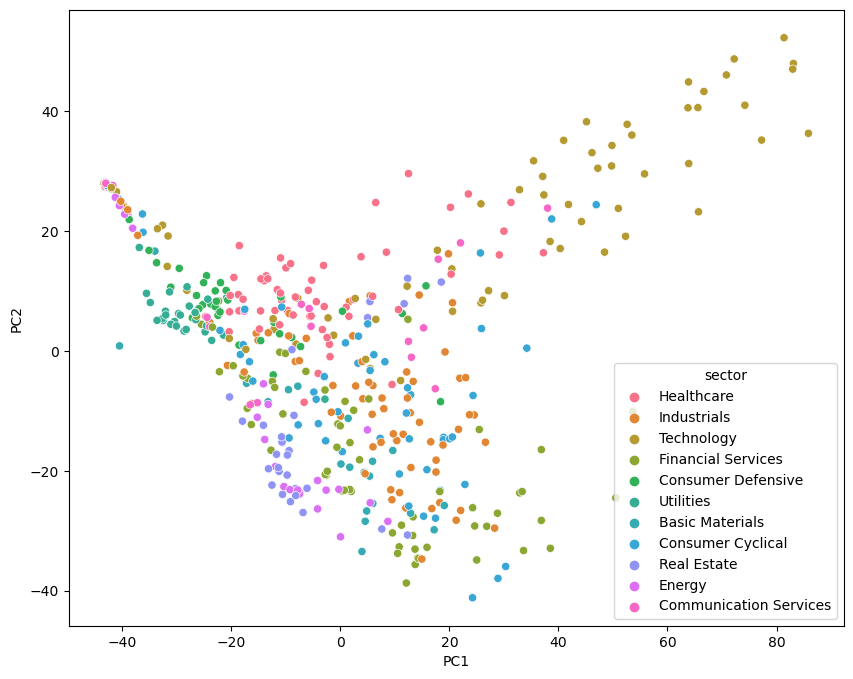

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=stocks_daily_return['sector'], data=df_out)
plt.show()

returning two components to the stock data into rem_cat data frame

In [31]:
rem_cat = stocks_daily_return.iloc[:, 2:]
#print(rem_cat.head())

In [32]:
silhouette_pca = silhouette_score(dfout, stocks_daily_return['sector'])
print(f"Silhouette score for PCA: {silhouette_pca}")

Silhouette score for PCA: -0.03238027181691901


#### TSNE

##### applying TSNE Dimension reduction on data so we can see which is much suitable for dimenstion reduction
* reducing data to dimension mean two components
* setting preplezity to 30 base on data set density
* iteration are set to 1500

In [33]:
rem_cat['label'] = stocks_daily_return['sector']
rem_cat['label'] = rem_cat['label'].astype('category')
X = rem_cat.drop('label', axis=1)
tsne = TSNE(n_components=2, perplexity=30, verbose=1, n_iter=1500)
tsne_results = tsne.fit_transform(X)
#rem_cat.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 467 samples in 0.004s...


C:\Users\97254\AppData\Local\Temp\ipykernel_13076\678327115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_cat['label'] = stocks_daily_return['sector']
C:\Users\97254\AppData\Local\Temp\ipykernel_13076\678327115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_cat['label'] = rem_cat['label'].astype('category')


[t-SNE] Computed neighbors for 467 samples in 0.132s...
[t-SNE] Computed conditional probabilities for sample 467 / 467
[t-SNE] Mean sigma: 25.863519
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.263992
[t-SNE] KL divergence after 1500 iterations: 1.275674


print new reduced dimensional data set

In [34]:
df_out2 = pd.DataFrame(tsne_results)
print(df_out2.head())

          0         1
0  3.996788  0.314794
1 -5.771731  6.250352
2  7.800719  1.621831
3 -2.580157 -0.999821
4 -8.112365 -2.911171


same ploting reduced data

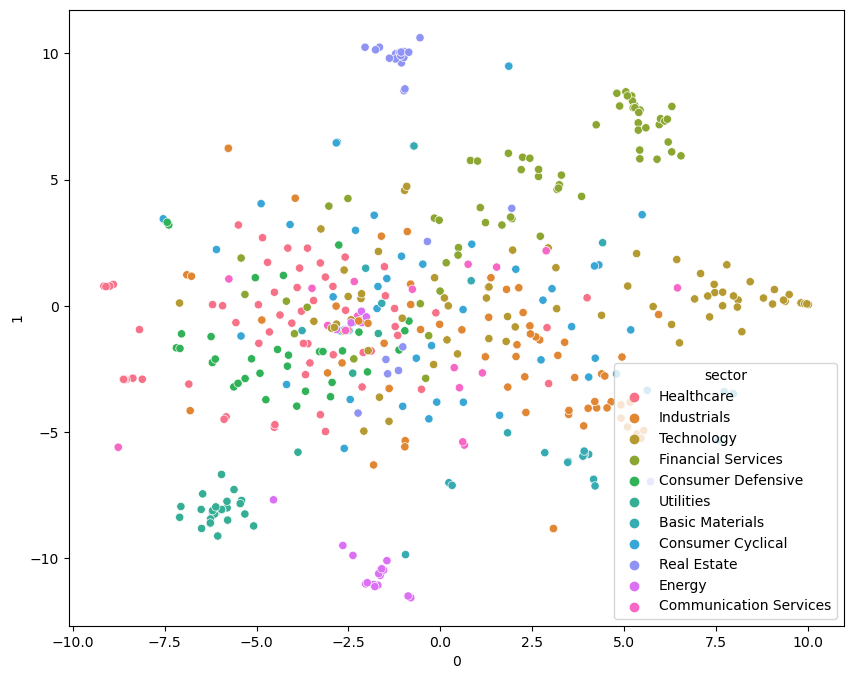

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_out2[0], y=df_out2[1], hue=stocks_daily_return['sector'])
plt.show()

In [36]:
silhouette_tsne = silhouette_score(tsne_results, rem_cat['label'])
print(f"Silhouette score for t-SNE: {silhouette_tsne}")


Silhouette score for t-SNE: 0.002875623758882284


We can see that the TSNE score is higher then the PCA score.
Then we will prefer TSNE. 




---



---



---



# Moving Toward Model Training

## K-means
* unsupervised machine learning technique that partitions a set of observations into a specified number of clusters (k), where each observation belongs to the cluster with the **nearest mean**

droping label column and training K-mean
* cluster number are 11 due to 11 secotr in our data set

In [37]:
rem_cat = rem_cat.drop('label', axis=1)
kmeans = KMeans(n_clusters=11, max_iter=20, n_init=25, random_state=123)
kmeans.fit(rem_cat)
df3_centers = pd.DataFrame(kmeans.cluster_centers_)
df3_centers.head()

C:\Users\97254\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.639186,1.111467,-0.251259,-1.007545,0.667938,-0.600331,-0.349637,1.754371,0.407532,-0.280982
1,0.436669,0.357229,-0.080033,-0.348328,0.461738,0.545954,0.281329,-0.332335,-0.967991,0.096774,...,-0.142986,0.808629,0.741446,-0.676978,0.208142,-0.359318,0.802773,0.238261,0.584869,-0.176508
2,0.435044,-0.321321,0.445809,-0.536643,0.747153,0.622182,0.890926,-0.769616,-1.019092,-0.162211,...,0.004656,-0.889982,0.135731,-1.631076,1.432933,-0.392926,1.012066,-0.288400,0.635494,-0.356800
3,1.212665,0.689780,-0.083111,0.001274,0.077152,0.453896,0.276854,-0.267841,-1.286051,0.175801,...,0.711132,0.014162,-0.337586,-0.941425,0.944919,0.392699,0.006962,-0.224682,0.256874,-0.757680
4,0.960630,0.428907,0.026098,0.389432,0.681026,0.710757,0.354963,-0.617939,-1.264756,0.269947,...,0.475546,0.213127,0.112167,-0.924769,0.864556,0.049031,0.242832,0.109749,-0.439089,-0.702223


Printing count of values in each clusters

In [38]:
df3_cluster = pd.DataFrame(kmeans.labels_, columns=['cluster_kmean'])
#print(df3_cluster.head())
print(df3_cluster['cluster_kmean'].value_counts())

5     135
4      98
7      86
9      50
3      36
1      27
2      18
6      14
10      1
8       1
0       1
Name: cluster_kmean, dtype: int64


plotting graph of cluster with the trained on TSNE reduced dataframe

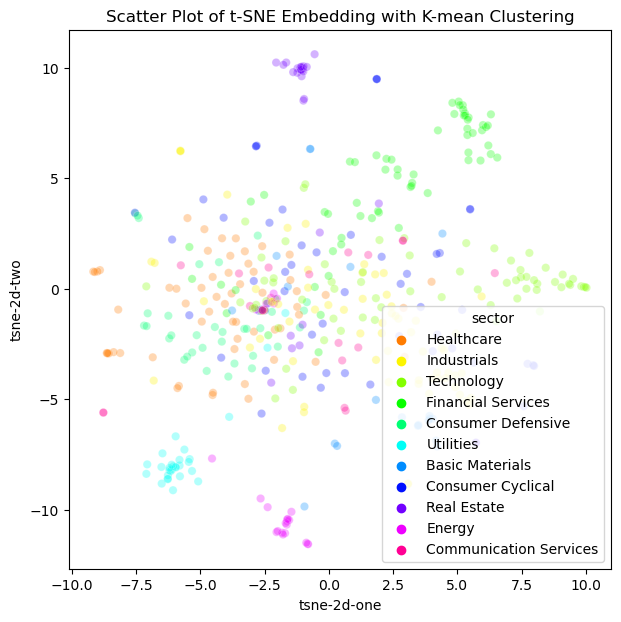

In [39]:
df_plot = df3_cluster.copy()
df_plot['tsne-2d-one'] = tsne_results[:,0]
df_plot['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(7,7))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=stocks_daily_return['sector'],palette=sns.color_palette("hsv", 11),data=df_plot,legend="full",alpha=0.3)
plt.title('Scatter Plot of t-SNE Embedding with K-mean Clustering')
plt.show()

Shwoing that in which clsuter which sector value and count belong

In [40]:
stocks_daily_return['cluster_kmean'] = df3_cluster['cluster_kmean']
d = pd.crosstab(stocks_daily_return['sector'], stocks_daily_return['cluster_kmean'])
print(d)

cluster_kmean           0   1   2   3   4   5   6   7   8   9   10
sector                                                            
Basic Materials          0   0   1   0  14   3   0   2   0   0   0
Communication Services   0   0   0   0   3   6   0   7   0   4   0
Consumer Cyclical        0   0   0   0  31   7   0  11   0   5   0
Consumer Defensive       0   0   0   0   3  30   0   0   0   0   0
Energy                   0   1  17   0   0   5   0   0   0   0   0
Financial Services       0   0   0  35   3   8   0  16   0   1   0
Healthcare               0   0   0   0   3  44   0   6   0   8   0
Industrials              1   0   0   1  39  14   0   9   0   3   1
Real Estate              0   0   0   0   1   1   0  25   0   2   0
Technology               0   0   0   0   1  14  14  10   1  27   0
Utilities                0  26   0   0   0   3   0   0   0   0   0


Printing Random Index for model evaluation

In [41]:
stocks_daily_return['sector_numeric'] = stocks_daily_return['sector'].astype('category').cat.codes
rand_index = adjusted_rand_score(stocks_daily_return['sector_numeric'], df3_cluster['cluster_kmean'])
print(rand_index)

0.21644535719568142




---



---



---



---



## Hierarchical Clustering
* build a hierarchy of clusters, either through a “bottom-up” (agglomerative) or “top-down” (divisive) approach
* we are using agglomerative approach

Trainin HC on 11 clusters

In [42]:
hclust = AgglomerativeClustering(n_clusters=11,affinity='euclidean')
hclust.fit(rem_cat)
df3_labels = pd.DataFrame(hclust.labels_, columns=['Cluster_HC'])
df3_clustered = pd.concat([rem_cat, df3_labels], axis=1)
df3_clustered.head()

C:\Users\97254\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,1995-05-08 00:00:00-04:00,1995-05-09 00:00:00-04:00,1995-05-10 00:00:00-04:00,1995-05-11 00:00:00-04:00,1995-05-12 00:00:00-04:00,1995-05-15 00:00:00-04:00,1995-05-16 00:00:00-04:00,1995-05-17 00:00:00-04:00,1995-05-18 00:00:00-04:00,1995-05-19 00:00:00-04:00,...,2014-01-09 00:00:00-05:00,2014-01-10 00:00:00-05:00,2014-01-13 00:00:00-05:00,2014-01-14 00:00:00-05:00,2014-01-15 00:00:00-05:00,2014-01-16 00:00:00-05:00,2014-01-17 00:00:00-05:00,2014-01-21 00:00:00-05:00,2014-01-22 00:00:00-05:00,Cluster_HC
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.188372,0.444373,0.663601,1.115599,0.702097,0.979436,-0.230137,0.214180,-0.559014,0
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.868289,0.447508,-1.473603,0.521719,0.138418,1.243939,4.348090,0.163075,-0.195368,2
2,1.880708,2.154036,0.301231,-1.802012,4.34809,-0.000027,1.449229,0.857106,-2.832700,-0.874838,...,-1.274695,-1.837650,1.568210,2.842671,0.249362,-0.616337,-1.902140,1.833630,-0.176072,4
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.344115,-0.407101,-1.421215,1.421699,-1.085881,1.077806,-0.750372,-0.557121,-2.480966,6
4,1.246139,-1.846170,0.313466,-0.000016,-4.24208,0.993378,2.295080,-0.961511,-2.588993,0.996585,...,0.000060,0.149378,0.485757,0.763372,-0.176773,0.834840,-0.853005,-3.795554,-0.315600,1


showing count of each cluster

In [43]:
df3_cluster = pd.DataFrame(hclust.labels_, columns=['Cluster_HC'])
#print(df3_cluster.head())
print(df3_cluster['Cluster_HC'].value_counts())

0     153
1      89
2      56
6      35
4      29
5      28
8      26
9      21
7      16
10      9
3       5
Name: Cluster_HC, dtype: int64


Visulizing the cluster generated by HC

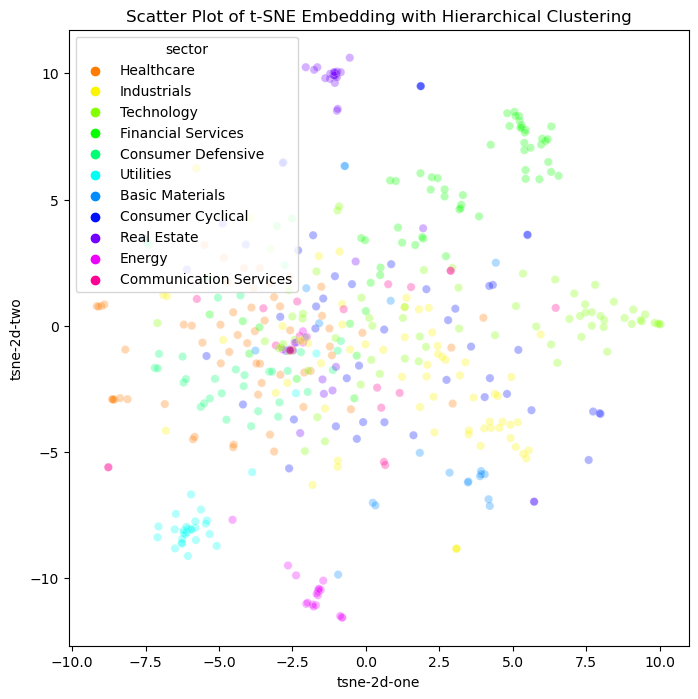

In [44]:
df_plot = pd.DataFrame(hclust.labels_, columns=['Cluster_HC'])
df_plot['tsne-2d-one'] = tsne_results[:,0]
df_plot['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,8))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=stocks_daily_return['sector'], palette=sns.color_palette("hsv", 11),data=df_plot,legend="full",alpha=0.3)
plt.title('Scatter Plot of t-SNE Embedding with Hierarchical Clustering')
plt.show()


Random Index score generated by HC algo

In [45]:
stocks_daily_return['sector_numeric'] = stocks_daily_return['sector'].astype('category').cat.codes
rand_index = adjusted_rand_score(stocks_daily_return['sector_numeric'], df3_cluster['Cluster_HC'])
print(rand_index)

0.2244605154698834




---



---



---



---



# Spectral Clustering
* Spectral Clustering is a technique that makes use of the spectrum (eigenvalues) of the similarity matrix of the data

Applying Spectral Clustering on the data set

In [46]:
sclust = SpectralClustering(n_clusters=11, assign_labels="discretize", random_state=45)
sclust.fit(rem_cat)
df3_cluster = pd.DataFrame(sclust.labels_, columns=['cluster_specteral'])
#print(df3_cluster.head())
print(df3_cluster['cluster_specteral'].value_counts())

0     128
7      85
3      57
2      51
1      37
4      35
5      28
10     22
9       9
6       8
8       7
Name: cluster_specteral, dtype: int64


C:\Users\97254\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Plotting the graph generated by specteral_clustering

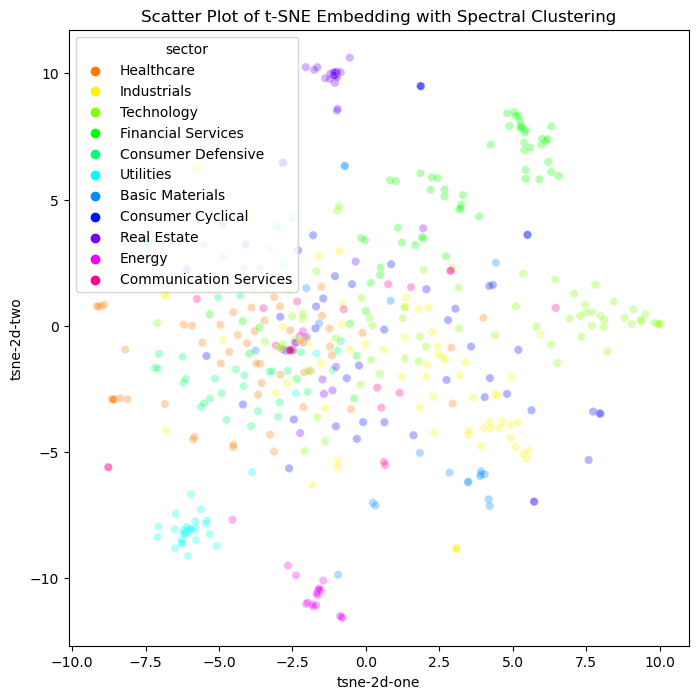

In [47]:
df_plot = df3_cluster.copy()
df_plot['tsne-2d-one'] = tsne_results[:,0]
df_plot['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,8))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=stocks_daily_return['sector'],palette=sns.color_palette("hsv", 11), data=df_plot,legend="full",alpha=0.3)
plt.title('Scatter Plot of t-SNE Embedding with Spectral Clustering')
plt.show()

Random Index for Specteral Clustering

In [48]:
stocks_daily_return['sector_numeric'] = stocks_daily_return['sector'].astype('category').cat.codes
rand_index = adjusted_rand_score(stocks_daily_return['sector_numeric'], df3_cluster['cluster_specteral'])
print(rand_index)

0.0035602474325082
